In [3]:
import re
import pandas as pd
import contractions
import numpy as np


ABBREVIATIONS = {
    # Government and Politics
    "gov.": "governor",
    "vp": "vice president",
    "potus": "president of the united states",
    "flotus": "first lady of the united states",
    "scotus": "supreme court of the united states",
    "sen.": "senator",
    "rep.": "representative",
    "cong.": "congress",
    "dept.": "department",
    "fbi": "federal bureau of investigation",
    "cia": "central intelligence agency",
    "nsa": "national security agency",
    "epa": "environmental protection agency",
    "fda": "food and drug administration",
    "sec": "securities and exchange commission",

    # Time and Dates
    "jan.": "january",
    "feb.": "february",
    "mar.": "march",
    "apr.": "april",
    "jun.": "june",
    "jul.": "july",
    "aug.": "august",
    "sep.": "september",
    "oct.": "october",
    "nov.": "november",
    "dec.": "december",
    "mon.": "monday",
    "tue.": "tuesday",
    "wed.": "wednesday",
    "thu.": "thursday",
    "fri.": "friday",
    "sat.": "saturday",
    "sun.": "sunday",

    # Measurements
    "ft.": "feet",
    "in.": "inches",
    "lb.": "pound",
    "oz.": "ounce",
    "gal.": "gallon",
    "pt.": "pint",
    "qt.": "quart",
    "mi.": "mile",
    "km.": "kilometer",
    "mph": "miles per hour",
    "kph": "kilometers per hour",

    # Technology
    "ai": "artificial intelligence",
    "iot": "internet of things",
    "api": "application programming interface",
    "ui": "user interface",
    "ux": "user experience",
    "vr": "virtual reality",
    "ar": "augmented reality",
    "cpu": "central processing unit",
    "gpu": "graphics processing unit",
    "ram": "random access memory",
    "rom": "read only memory",
    "ssd": "solid state drive",
    "hdd": "hard disk drive",

    # Business and Finance
    "ceo": "chief executive officer",
    "cfo": "chief financial officer",
    "cto": "chief technology officer",
    "cmo": "chief marketing officer",
    "coo": "chief operating officer",
    "llc": "limited liability company",
    "inc.": "incorporated",
    "corp.": "corporation",
    "ltd.": "limited",
    "nyse": "new york stock exchange",
    "nasdaq": "national association of securities dealers automated quotations",

    # Medical
    "dr.": "doctor",
    "md": "medical doctor",
    "rn": "registered nurse",
    "er": "emergency room",
    "icu": "intensive care unit",
    "covid": "coronavirus disease",
    "hiv": "human immunodeficiency virus",
    "aids": "acquired immunodeficiency syndrome",
    "ptsd": "post traumatic stress disorder",
    "adhd": "attention deficit hyperactivity disorder",
    "ct": "computed tomography",
    "mri": "magnetic resonance imaging",

    # Education
    "prof.": "professor",
    "univ.": "university",
    "assoc.": "associate",
    "b.a.": "bachelor of arts",
    "b.s.": "bachelor of science",
    "m.a.": "master of arts",
    "m.s.": "master of science",
    "ph.d.": "doctor of philosophy",
    "esl": "english as a second language",

    # Military
    "gen.": "general",
    "col.": "colonel",
    "capt.": "captain",
    "sgt.": "sergeant",
    "cpl.": "corporal",
    "pvt.": "private",
    "usaf": "united states air force",
    "usmc": "united states marine corps",
    "usn": "united states navy",

    # Miscellaneous
    "eta": "estimated time of arrival",
    "rsvp": "please respond",
    "asap": "as soon as possible",
    "etc.": "et cetera",
    "i.e.": "that is",
    "e.g.": "for example",
    "vs.": "versus",
    "no.": "number",
    "tel.": "telephone",
    "temp.": "temperature",
    "vol.": "volume",
    "fig.": "figure"
}

def expand_contractions(text):
  return contractions.fix(text)

def expand_abbreviations(text):
  words= text.split()
  words = [ABBREVIATIONS[word.lower()] if word.lower() in ABBREVIATIONS else word for word in words]
  return " ".join(words)

def clean_text(text):
  text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)   # Remove special characters
  text = re.sub(r'\s+', ' ', text).strip()     # Remove extra whitespace
  return text.lower()

def preprocess_text(text):
  text= expand_contractions(text)
  text = expand_abbreviations(text)
  text= clean_text(text)
  return text


In [4]:
df = pd.read_csv("CLAN_data.csv")

# Rename columns for ease
df.rename(columns={'Social Media Post': 'post', 'Normalized Claim': 'normalized_claim'}, inplace=True)

# Apply preprocessing
df['post'] = df['post'].astype(str).apply(preprocess_text)
df['normalized_claim'] = df['normalized_claim'].astype(str).apply(preprocess_text)

# Save the fully preprocessed dataset
df.to_csv("CLAN_data_preprocessed.csv", index=False)

# Split into train (70%), val (15%), test (15%)
train_df, val_df, test_df = np.split(df.sample(frac=1, random_state=42), [int(0.7*len(df)), int(0.85*len(df))])

# Save the preprocessed data
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

print("Preprocessing Done! Data saved as train.csv, val.csv, and test.csv")

Preprocessing Done! Data saved as train.csv, val.csv, and test.csv


C:\Users\Adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
import pandas as pd
from datasets import Dataset

# Function to load dataset into Hugging Face format
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    dataset = Dataset.from_pandas(df)
    return dataset

# Load train, validation, and test datasets
train_dataset = load_dataset("train.csv")
val_dataset = load_dataset("val.csv")
test_dataset = load_dataset("test.csv")

print(" Dataset Loaded Successfully!")


 Dataset Loaded Successfully!


In [ ]:
import matplotlib.pyplot as plt
from transformers import (
    AutoTokenizer, AutoModelForSeq2SeqLM,
    TrainingArguments, Trainer, TrainerCallback
)
import torch

# FAST mode for quicker training
FAST_DEBUG = True

# Custom callback to track training loss
class TrainLossLoggerCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.train_losses.append((state.global_step, logs["loss"]))

# Preprocessing function
def preprocess_dataset(dataset, tokenizer, source_col="post", target_col="normalized_claim"):
    def preprocess_function(examples):
        inputs = [str(text) for text in examples[source_col]]
        targets = [str(text) for text in examples[target_col]]
        model_inputs = tokenizer(inputs, max_length=256, truncation=True, padding="max_length")
        with tokenizer.as_target_tokenizer():
            labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")
        model_inputs["labels"] = labels["input_ids"]
        return model_inputs
    return dataset.map(preprocess_function, batched=True)

if FAST_DEBUG:
    train_dataset = train_dataset.shuffle(seed=42).select(range(300))
    val_dataset = val_dataset.shuffle(seed=42).select(range(100))

# Shared training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=False,
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3 if FAST_DEBUG else 5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=20,
    save_steps=500,
    save_total_limit=1,
    fp16=torch.cuda.is_available(),
    report_to="none"
)


Training BART...


Map: 100%|██████████| 300/300 [00:00<00:00, 4622.59 examples/s]
C:\Users\Adity\AppData\Local\Temp\ipykernel_5480\399693383.py:10: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  bart_trainer = Trainer(


Step,Training Loss
20,9.107600
40,4.388400
60,2.802800
80,1.931400
100,1.451300


C:\Users\Adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


✅ BART model saved.


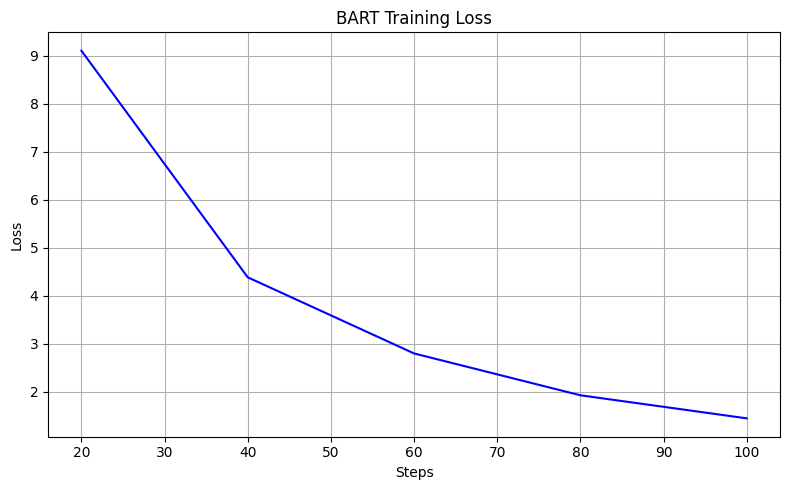

In [14]:
# BART Training
print("Training BART...")
bart_logger = TrainLossLoggerCallback()
bart_checkpoint = "facebook/bart-base"
bart_tokenizer = AutoTokenizer.from_pretrained(bart_checkpoint)
bart_model = AutoModelForSeq2SeqLM.from_pretrained(bart_checkpoint)

tokenized_train_bart = preprocess_dataset(train_dataset, bart_tokenizer)

bart_trainer = Trainer(
    model=bart_model,
    args=training_args,
    train_dataset=tokenized_train_bart,
    tokenizer=bart_tokenizer,
    callbacks=[bart_logger]
)

bart_trainer.train()
bart_trainer.save_model("best_model_bart")
bart_tokenizer.save_pretrained("best_model_bart")
print("✅ BART model saved.")

# Plot training loss
steps, losses = zip(*bart_logger.train_losses)
plt.figure(figsize=(8, 5))
plt.plot(steps, losses, label="Training Loss", color="blue")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("BART Training Loss")
plt.grid(True)
plt.tight_layout()
plt.savefig("bart_training_loss.png")
plt.show()


Training T5...


Map:   0%|          | 0/300 [00:00<?, ? examples/s]C:\Users\Adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
Map: 100%|██████████| 300/300 [00:00<00:00, 3573.71 examples/s]
C:\Users\Adity\AppData\Local\Temp\ipykernel_5480\1964691344.py:10: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  t5_trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g

Step,Training Loss
20,11.493200
40,6.079900
60,2.801300
80,2.084400
100,1.916600


✅ T5 model saved.


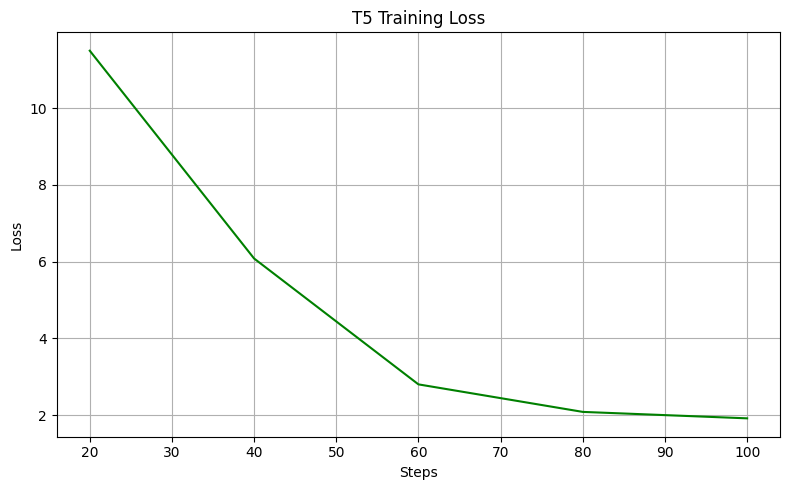

In [15]:
# T5 Training
print("Training T5...")
t5_logger = TrainLossLoggerCallback()
t5_checkpoint = "t5-small"
t5_tokenizer = AutoTokenizer.from_pretrained(t5_checkpoint)
t5_model = AutoModelForSeq2SeqLM.from_pretrained(t5_checkpoint)

tokenized_train_t5 = preprocess_dataset(train_dataset, t5_tokenizer)

t5_trainer = Trainer(
    model=t5_model,
    args=training_args,
    train_dataset=tokenized_train_t5,
    tokenizer=t5_tokenizer,
    callbacks=[t5_logger]
)

t5_trainer.train()
t5_trainer.save_model("best_model_t5")
t5_tokenizer.save_pretrained("best_model_t5")
print("✅ T5 model saved.")

# Plot training loss
steps, losses = zip(*t5_logger.train_losses)
plt.figure(figsize=(8, 5))
plt.plot(steps, losses, label="Training Loss", color="green")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("T5 Training Loss")
plt.grid(True)
plt.tight_layout()
plt.savefig("t5_training_loss.png")
plt.show()


In [2]:
import evaluate
from bert_score import score as bert_score
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
import torch
from datasets import Dataset
from tqdm import tqdm

# Load test data
test_df = pd.read_csv("test.csv")
test_dataset = Dataset.from_pandas(test_df)

# Generate predictions from a model
def generate_predictions(model, tokenizer, dataset, source_col="post", batch_size=8):
    model.eval()
    model.to("cuda" if torch.cuda.is_available() else "cpu")
    device = model.device

    inputs = [str(x) for x in dataset[source_col]]
    predictions = []

    for i in tqdm(range(0, len(inputs), batch_size)):
        batch_inputs = inputs[i:i + batch_size]
        encodings = tokenizer(batch_inputs, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model.generate(**encodings, max_length=128)
        preds = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        predictions.extend(preds)

    return predictions

# Evaluation metrics function
def evaluate_model(predictions, references):
    # Clean up inputs
    predictions = [str(pred) if isinstance(pred, str) else "" for pred in predictions]
    references = [str(ref) if isinstance(ref, str) else "" for ref in references]

    # BLEU
    bleu = evaluate.load("bleu")
    bleu.add_batch(predictions=predictions, references=[[ref] for ref in references])
    bleu_score = bleu.compute()["bleu"]

    # ROUGE-L
    rouge = evaluate.load("rouge")
    rouge.add_batch(predictions=predictions, references=references)
    rouge_score = rouge.compute()["rougeL"]

    # BERTScore
    P, R, F1 = bert_score(predictions, references, lang="en", verbose=False)
    bert_score_f1 = F1.mean().item()

    return {
        "BLEU-4": bleu_score,
        "ROUGE-L": rouge_score,
        "BERTScore-F1": bert_score_f1
    }

# Load model and tokenizer
def load_model_and_tokenizer(model_path):
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    return model, tokenizer

# Run for BART
bart_model, bart_tokenizer = load_model_and_tokenizer("best_model_bart")
bart_predictions = generate_predictions(bart_model, bart_tokenizer, test_dataset)
bart_references = test_df["normalized_claim"].fillna("").astype(str).tolist()
bart_metrics = evaluate_model(bart_predictions, bart_references)

# Run for T5
t5_model, t5_tokenizer = load_model_and_tokenizer("best_model_t5")
t5_predictions = generate_predictions(t5_model, t5_tokenizer, test_dataset)
t5_references = test_df["normalized_claim"].fillna("").astype(str).tolist()
t5_metrics = evaluate_model(t5_predictions, t5_references)

# Print results as a comparison matrix
print("\nEvaluation Metrics (Test Set)")
print("--------------------------------------")
print(f"{'Model':<10} {'BLEU-4':<10} {'ROUGE-L':<10} {'BERTScore-F1':<15}")
print(f"{'-'*45}")
print(f"{'BART':<10} {bart_metrics['BLEU-4']:<10.4f} {bart_metrics['ROUGE-L']:<10.4f} {bart_metrics['BERTScore-F1']:<15.4f}")
print(f"{'T5':<10} {t5_metrics['BLEU-4']:<10.4f} {t5_metrics['ROUGE-L']:<10.4f} {t5_metrics['BERTScore-F1']:<15.4f}")


100%|██████████| 53/53 [05:22<00:00,  6.08s/it]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 53/53 [03:33<00:00,  4.02s/it]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Evaluation Metrics (Test Set)
--------------------------------------
Model      BLEU-4     ROUGE-L    BERTScore-F1   
---------------------------------------------
BART       0.2533     0.3532     0.8738         
T5         0.1926     0.3051     0.8496         


In [ ]:
import pandas as pd
import re
import evaluate
from bert_score import score as bert_score
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from datasets import Dataset
from tqdm import tqdm
import contractions

# ========== 1. TEXT PREPROCESSING ========== #
def preprocess_text(text):
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    return text.lower().strip()

def preprocess_dataframe(df):
    df = df.copy()
    df["post"] = df["post"].astype(str).apply(preprocess_text)
    return df

# ========== 2. LOAD MODEL & TOKENIZER ========== #
def load_model_and_tokenizer(model_path):
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    return model, tokenizer

# ========== 3. GENERATE NORMALIZED CLAIMS ========== #
def generate_predictions(model, tokenizer, dataset, source_col="post", batch_size=8):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    inputs = [str(x) for x in dataset[source_col]]
    predictions = []

    for i in tqdm(range(0, len(inputs), batch_size)):
        batch = inputs[i:i + batch_size]
        encodings = tokenizer(batch, padding=True, truncation=True, max_length=256, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model.generate(**encodings, max_length=128)
        decoded = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        predictions.extend(decoded)

    return predictions

# ========== 4. EVALUATION METRICS ========== #
def evaluate_model(predictions, references):
    predictions = [str(p) for p in predictions]
    references = [str(r) for r in references]

    # BLEU-4
    bleu = evaluate.load("bleu")
    bleu.add_batch(predictions=predictions, references=[[r] for r in references])
    bleu_score = bleu.compute()["bleu"]

    # ROUGE-L
    rouge = evaluate.load("rouge")
    rouge.add_batch(predictions=predictions, references=references)
    rouge_score = rouge.compute()["rougeL"]

    # BERTScore
    P, R, F1 = bert_score(predictions, references, lang="en", verbose=False)
    bert_score_f1 = F1.mean().item()

    return {
        "BLEU-4": round(bleu_score, 4),
        "ROUGE-L": round(rouge_score, 4),
        "BERTScore-F1": round(bert_score_f1, 4)
    }

# ========== 5. MAIN INFERENCE LOGIC ========== #
def run_inference(test_path="test.csv"):
    test_df = pd.read_csv(test_path)
    test_df = preprocess_dataframe(test_df)
    test_dataset = Dataset.from_pandas(test_df)

    bart_model, bart_tokenizer = load_model_and_tokenizer("best_model_bart")
    t5_model, t5_tokenizer = load_model_and_tokenizer("best_model_t5")

    # Generate outputs
    bart_preds = generate_predictions(bart_model, bart_tokenizer, test_dataset)
    t5_preds = generate_predictions(t5_model, t5_tokenizer, test_dataset)

    test_df["bart_output"] = bart_preds
    test_df["t5_output"] = t5_preds

    if "normalized_claim" in test_df.columns:
        references = test_df["normalized_claim"].fillna("").tolist()
        print("\n=== Evaluation Metrics ===\n")
        print(f"{'Model':<10} | {'BLEU-4':<8} | {'ROUGE-L':<8} | {'BERTScore-F1':<12}")
        print("-" * 45)
        bart_metrics = evaluate_model(bart_preds, references)
        t5_metrics = evaluate_model(t5_preds, references)
        print(f"{'BART':<10} | {bart_metrics['BLEU-4']:<8} | {bart_metrics['ROUGE-L']:<8} | {bart_metrics['BERTScore-F1']:<12}")
        print(f"{'T5':<10} | {t5_metrics['BLEU-4']:<8} | {t5_metrics['ROUGE-L']:<8} | {t5_metrics['BERTScore-F1']:<12}")
    else:
        print("Note: 'normalized_claim' column not found. Skipping evaluation.")

    test_df.to_csv("test_with_predictions.csv", index=False)
    print("Predictions saved to test_with_predictions.csv")

# ========== 6. RUN ========== #
if __name__ == "__main__":
    run_inference("test.csv")
